# 1. Preparing environment

## 1.1 Installing packages

## 1.2 Adding source and path to find files (Google Colab)

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Voice of Nature/WP3/Csilla's Thesis coding"
os.chdir(path)

## 1.3 Importing libraries

In [3]:
# loading libraries for tabular data handling
import pandas as pd
import numpy as np
import re

# loading libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# see each section for model-specific imports

## 1.4 Defining functions

In [5]:
# see each section for specific functions











# 2. Loading data

In [6]:
merged_df = pd.read_csv('merged.csv')
merged_df.head(2)

,respondent_id,wkt_x,category,wish,comment,gender,age,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt_y,danish_speaker
0,72het4dmv4k3,POINT (12.612999 55.717601),wild_nature,1,NaN,Woman,40.0,Yes,No,No,Yes,Yes,Employed,over 1.000.000 kr,POINT (12.581654 55.706155),1.0
1,88pna6cwg8x6,POINT (12.617608 55.725923),wild_nature,1,"Animals The beauty, the calm.",Woman,71.0,Yes,No,No,NaN,NaN,NaN,NaN,POINT (12.558491 55.705762),1.0


# 3. Word counts

## 3.1 Importing libraries

In [7]:
# text preprocessing and analysis
import re

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

import inflect
p = inflect.engine()

# word counts
from collections import Counter

In [8]:
# I removed references to previous comments since they influenced my model outcomes
stopwords_set.add('see')
stopwords_set.add('previous')
stopwords_set.add('previou')
stopwords_set.add('answers')
stopwords_set.add('answer')
stopwords_set.add('also')
stopwords_set.add('as')
stopwords_set.add('describe')
stopwords_set.add('described')
stopwords_set.add('above')

## 3.2 Defining functions

In [9]:
# Initialize the inflect engine
def tokenise_text_clean(text):
    '''Tokenises corpus, removes punctuation and stopwords, lowers all strings, lemmatizes.'''
    if type(text) == str:
        words = nltk.tokenize.word_tokenize(text)  # Convert to string to handle NaN values
        words = [word for word in words if word.isalpha()]
        words = [word.lower() for word in words]
        words = [word for word in words if word not in stopwords_set]

        # Singularize nouns
        words = [p.singular_noun(word) if p.singular_noun(word) else word for word in words]

        text = " ".join(words)
        words = wnl.lemmatize(text).split()
    else:
        words = ['']
    return words

In [10]:
def plot_topwords(common_words, title, show=False):
  '''Plots most common words from ordered list of tuples [(word, count), ...].'''
  # Convert the data to a DataFrame for easier plotting
  top_words_df = pd.DataFrame(common_words[:30], columns=['word', 'count'])

  # Plot using sns.barplot
  plt.figure(figsize=(12, 8))
  sns.barplot(x='count', y='word', data=top_words_df, palette='crest', hue='word', legend=False)
  plt.title(title)
  plt.xlabel('Count')
  plt.ylabel('Word')

  # saving figure
  png_name = re.sub('- ', '', title.lower())
  png_name = re.sub(' ', '_', png_name)
  plt.savefig('240517_' + png_name + '.png')

  # show plot
  if show == True:
    plt.show()
  else:
    plt.close()

## 3.2 Preprocess

In [11]:
merged_df['unigrams'] = merged_df['comment'].apply(lambda x: tokenise_text_clean(x))

In [12]:
# doing an overall word count
tokens = []
merged_df['unigrams'].apply(lambda x: tokens.extend(x) if x != [''] else None)
word_counts = Counter(tokens)
common_words = word_counts.most_common()
plot_topwords(common_words, 'overall', show=False)

## 3.3 Word counts per split / category / wish-wish_for_no

In [ ]:
df = merged_df.copy()

In [ ]:
category_topwords = pd.DataFrame(columns=['category', 'wish', 'length', 'common_words'])

for i in df.category.unique():
  for j in range(2):
    plot_title = 'Category: '+i+', Wish: '+str(j)
    tokens = []
    l = len(df[(df.category==i)&(df.wish==j)])
    df[(df.category==i)&(df.wish==j)]['unigrams'].apply(lambda x: tokens.extend(x) if x != [''] else None)
    word_counts = Counter(tokens)
    common_words = word_counts.most_common()
    category_topwords.loc[len(category_topwords.index)] = [i, j, l, common_words]
    # plot_topwords(common_words, title=plot_title, show=False)

In [ ]:
category_topwords.to_csv('category_topwords.csv', index=False)

In [ ]:
gender_topwords = pd.DataFrame(columns=['category', 'gender', 'wish', 'length', 'common_words'])

for k in ['Man', 'Woman']:
  for i in df.category.unique():
    for j in range(2):
      plot_title = 'Gender: '+k+', Category: '+i+', Wish: '+str(j)
      tokens = []
      l = len(df[(df.category==i)&(df.wish==j)&(df.gender==k)])
      df[(df.category==i)&(df.wish==j)&(df.gender==k)]['unigrams'].apply(lambda x: tokens.extend(x) if x != [''] else None)
      word_counts = Counter(tokens)
      common_words = word_counts.most_common(30)
      gender_topwords.loc[len(gender_topwords.index)] = [i, k, j, l, common_words]
      # plot_topwords(common_words, title=plot_title, show=False)

In [ ]:
gender_topwords.to_csv('gender_topwords.csv', index=False)

In [ ]:
children_topwords = pd.DataFrame(columns=['category', 'children', 'wish', 'length', 'common_words'])

for k in ['Yes', 'No']:
  for i in df.category.unique():
    for j in range(2):
      plot_title = 'Children: '+k+', Category: '+i+', Wish: '+str(j)
      tokens = []
      l = len(df[(df.category==i)&(df.wish==j)&(df.children_under18==k)])
      df[(df.category==i)&(df.wish==j)&(df.children_under18==k)]['unigrams'].apply(lambda x: tokens.extend(x) if x != [''] else None)
      word_counts = Counter(tokens)
      common_words = word_counts.most_common(30)
      children_topwords.loc[len(children_topwords.index)] = [i, k, j, l, common_words]
      # plot_topwords(common_words, title=plot_title, show=False)

In [ ]:
children_topwords.to_csv('children_topwords.csv', index=False)

## 3.3 Keywords to geojson

In [15]:
keywords = ['fish', 'fishing', 'bench', 'dog', 'swim', 'swimming', 'beach', 'football', 'basketball', 'skate', 'noise']

In [16]:
for keyword in keywords:
  print(keyword, ':', len(merged_df[merged_df.unigrams.apply(lambda x: keyword in x)]))
  merged_df[keyword] = merged_df.unigrams.apply(lambda x: 1 if keyword in x else 0)

fish : 8
fishing : 27
bench : 65
dog : 37
swim : 46
swimming : 139
beach : 112
football : 145
basketball : 24
skate : 6
noise : 41


In [17]:
merged_df['swim_ming'] = merged_df['swim'] + merged_df['swimming']
merged_df['fish_ing'] = merged_df['fish'] + merged_df['fishing']

In [18]:
import geopandas as gpd
merged_df['geometry'] = gpd.GeoSeries.from_wkt(merged_df['wkt_x'])
merged_df = merged_df.drop(['wkt_x'], axis=1)
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')
gdf = gdf.set_crs(epsg='4326')
gdf = gdf.drop(['unigrams'], axis=1)
gdf.to_file('merged_df.geojson')

# 4. Wordfish
- code was re-purposed from the exercise class codes used at Advanced Social Data Science II.
- the wordfish scaler used is from the implementation by Nanni et al. (2021): https://github.com/umanlp/SemScale

## 4.1 Importing libraries

In [ ]:
path = "/content/drive/MyDrive/Voice of Nature/WP3/Csilla's Thesis coding/SemScale"
os.chdir(path)

In [ ]:
#Scaling packages
from helpers import io_helper
from wfcode import corpus
from wfcode import scaler
import argparse

## 4.2 Preprocessing

In [ ]:
merged_df['preprossed_text'] = merged_df.unigrams.apply(lambda x: ' '. join(x))
merged_df.head(2)

,respondent_id,category,wish,comment,gender,age,nn_awareness,sports_member,enviro_member,children_under18,...,swim,fish,bench,run,beach,wild,basketball,skate,geometry,preprossed_text
0,72het4dmv4k3,wild_nature,1,NaN,Woman,40.0,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,POINT (12.61300 55.71760),
1,88pna6cwg8x6,wild_nature,1,"Animals The beauty, the calm.",Woman,71.0,Yes,No,No,NaN,...,0,0,0,0,0,0,0,0,POINT (12.61761 55.72592),animal beauty calm


In [ ]:
# grouping by categories
subset = merged_df.groupby(['category'], as_index = False).agg({'preprossed_text': lambda x: ' '.join(x)})
subset

,category,preprossed_text
0,facilities_other,bathing option igen der mangler alternativer t...
1,lawns_flowers,sport huge shortage pitch ryparken cour...
2,other,noise speaker party etc hard find peace quiet ...
3,social_areas,bathing jetty real lack alternative silo loca...
4,sports_facilities,running discontinued smart lighting soft sur...
5,wild_nature,animal beauty calm north forest cope coastal ...


In [ ]:
subset_doc = list(zip(subset['category'], subset['preprossed_text']))

In [ ]:
# parameter setting: using default parameters as used in the github code
niter = 5000      #number of iterations
lr = 0.00001      #learning rate
stopwords = None  #we've already removed stopwords

In [ ]:
# creating a corpus object
corp = corpus.Corpus(subset_doc)
corp.tokenize(stopwords = stopwords)

Loading corpus, received: 6 docs.
2024-05-21 19:56:46 Preprocessing corpus...


In [ ]:
# building the document-feature matrix
corp.build_occurrences()

2024-05-21 19:56:54 Building vocabulary...
2024-05-21 19:56:54 Building coocurrence matrix...
1/6
2/6
3/6
4/6
5/6
6/6


In [ ]:
# checking the shape of the document-feature matrix
corp.occurrences.shape

(6, 3322)

In [ ]:
# checking the vocabulary
corp.vocabulary

{'bathing': 0,
 'option': 1,
 'igen': 2,
 'der': 3,
 'mangler': 4,
 'alternativer': 5,
 'til': 6,
 'main': 7,
 'spot': 8,
 'swimming': 9,
 'beach': 10,
 'lack': 11,
 'area': 12,
 'none': 13,
 'entire': 14,
 'nordhavn': 15,
 'nature': 16,
 'waterpark': 17,
 'large': 18,
 'pool': 19,
 'slide': 20,
 'sauna': 21,
 'ice': 22,
 'bath': 23,
 'hot': 24,
 'tub': 25,
 'copenhagen': 26,
 'water': 27,
 'activity': 28,
 'create': 29,
 'great': 30,
 'gathering': 31,
 'point': 32,
 'harbour': 33,
 'basin': 34,
 'place': 35,
 'swim': 36,
 'padel': 37,
 'squash': 38,
 'volleyball': 39,
 'etc': 40,
 'life': 41,
 'togethernes': 42,
 'could': 43,
 'banger': 44,
 'bang': 45,
 'city': 46,
 'growing': 47,
 'able': 48,
 'get': 49,
 'quickly': 50,
 'dweller': 51,
 'luxury': 52,
 'everywhere': 53,
 'need': 54,
 'utilise': 55,
 'anything': 56,
 'wild': 57,
 'free': 58,
 'prevent': 59,
 'pedestrian': 60,
 'foot': 61,
 'traffic': 62,
 'avoid': 63,
 'degradation': 64,
 'already': 65,
 'crowded': 66,
 'expanding': 6

## 4.3 Training the wordfish scaler

In [ ]:
from datetime import datetime

In [ ]:
wf_scaler = scaler.WordfishScaler(corp)

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " WordFish scaling begun.")

wf_scaler.initialize()
wf_scaler.train(learning_rate = lr, num_iters = niter)

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " WordFish scaling completed.")

2024-05-21 19:57:27 WordFish scaling begun.
Initializing...
Alpha docs: 
[ 0.          0.08676332 -0.3508027   0.03236251  0.12268254  0.95342565]
Training...
Initial objective score: -35761.9765625
Iteration (secondary) 1: -35765.89453125
Iteration (secondary) 101: -36101.51171875
Iteration (secondary) 201: -36356.33203125
Iteration (secondary) 301: -36562.20703125
Iteration (secondary) 401: -36736.625
Iteration (secondary) 501: -36889.109375
Iteration (secondary) 601: -37025.1953125
Iteration (secondary) 701: -37148.3984375
Iteration (secondary) 801: -37261.1171875
Iteration (secondary) 901: -37365.09375
Iteration (secondary) 1001: -37461.65625
Iteration (secondary) 1101: -37551.8125
Iteration (secondary) 1201: -37636.4140625
Iteration (secondary) 1301: -37716.11328125
Iteration (secondary) 1401: -37791.484375
Iteration (secondary) 1501: -37862.9921875
Iteration (secondary) 1601: -37931.03515625
Iteration (secondary) 1701: -37995.9453125
Iteration (secondary) 1801: -38058.015625
Iter

## 4.4 Investigating results

In [ ]:
# omega values (estimated position of documents)
corp.results

{'facilities_other': 0.45184895,
 'lawns_flowers': 0.07867762,
 'other': 1.0249503,
 'social_areas': 0.43099636,
 'sports_facilities': 0.14261635,
 'wild_nature': -2.1290896}

In [ ]:
# beta values (word weights)
beta = wf_scaler.beta_words

# obtaining the lowest and highest beta values
max10_ind = beta.argsort()[-10:]
min10_ind = beta.argsort()[:10]

In [ ]:
# preparing vocabulary to be able to access it by index
vocab_words = list(corp.vocabulary.keys())

In [ ]:
# words with the max 10 beta values
for i in max10_ind:
    print(vocab_words[i], ' -- ', beta[i])

pool  --  0.31399977
outdoor  --  0.31696883
playground  --  0.31856662
club  --  0.32237732
social  --  0.35706708
sport  --  0.37355226
activity  --  0.3793445
facility  --  0.44343108
bathing  --  0.47564095
swimming  --  0.57889515


In [ ]:
# words with the min 10 beta values
for i in min10_ind:
    print(vocab_words[i], ' -- ', beta[i])

tree  --  -0.73416567
wild  --  -0.6887574
forest  --  -0.60544664
nature  --  -0.5867885
biodiversity  --  -0.5695649
shrub  --  -0.56094867
animal  --  -0.52674985
bird  --  -0.49382788
insect  --  -0.44950154
plant  --  -0.41058928


In [ ]:
# psi values (frequency of individual words)
psi = wf_scaler.psi_words

dfm = np.subtract(corp.occurrences, 1)

print('Frequency of word with highest psi value:',np.sum(dfm[:, psi.argmax()]))
print('Most frequent word: ',vocab_words[psi.argmax()])
print('Frequency of word with lowest psi value: ', np.sum(dfm[:, psi.argmin()]))
print('Least frequent word: ',vocab_words[psi.argmin()])

Frequency of word with highest psi value: 897.0
Most frequent word:  area
Frequency of word with lowest psi value:  1.0
Least frequent word:  salty


## 4.5 merged categories to geojson

In [23]:
wild_nature_hotspots = merged_df[((merged_df.category == 'wild_nature') & (merged_df.wish == 1)) | ((merged_df.category != 'wild_nature') & (merged_df.wish == 0))]
wild_nature_coldspots = merged_df[((merged_df.category != 'wild_nature') & (merged_df.wish == 1)) | ((merged_df.category == 'wild_nature') & (merged_df.wish == 0))]

In [35]:
len(wild_nature_hotspots)

3142

In [36]:
len(wild_nature_coldspots)

2200

In [33]:
for i, name in zip([wild_nature_hotspots, wild_nature_coldspots], ['wild_nature_hotspots', 'wild_nature_coldspots']):
  filename = name + '.geojson'
  # df['geometry'] = gpd.GeoSeries.from_wkt(df['wkt_x'])
  # df = df.drop(['wkt_x'], axis=1)
  gdf = gpd.GeoDataFrame(i, geometry='geometry')
  gdf = gdf.set_crs(epsg='4326')
  gdf = gdf.drop(['unigrams'], axis=1)
  gdf.to_file(filename)

# 5. Topic modelling
- code snippets were re-purposed from the exercise class codes used at Advanced Social Data Science II.
- added coherence measure to identify best number of topics
1. Loading & preparing the data
2. Creating unigrams & bigrams
3. Creating a dictionary mapping between words and ids
4. Remove very frequent and infrequent words
5. Creating a bow for each document
6. Running an LDA algorithm
7. Explore topics

## 5.1 Loading libraries

In [ ]:
# Topic modelling
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import logging # This is to provide logging of information when running the LDA
import sys # This is to disable logging when it's no longer needed

## 5.2 Defining function

In [ ]:
def bigrams(doc):
    '''Creates bigrams from a list of unigrams that are in the same order as in the original texts.'''
    bigrams = []

    for bigram in list(nltk.bigrams(doc)):  # Creating bigrams as tuples with nltk.bigrams and iterating over these them
        bigrams.append("_".join(bigram))    # Joining each bigram-tuple pair with an underscore and saving to list

    return bigrams

In [ ]:
def countplot(data, x, order=None, hue=None, hue_order=None, ax=None, palette='Spectral', title='', show=True,):
    if hue is None:
        palette = None

    sns.countplot(data=data, x=x, order=order, hue=hue, hue_order=hue_order, palette=palette, ax=ax)

    if hue is not None:
        plt.legend(title=hue)

    plt.xticks(rotation=90)
    plt.title(title)

    # saving figure
    png_name = re.sub('- ', '', title.lower())
    png_name = re.sub(' ', '_', png_name)
    plt.savefig('240520_' + png_name + '.png')

    # show plot
    if show == True:
      plt.show()
    else:
      plt.close()

## 5.3 Preparing data

In [ ]:
df = merged_df.copy()
print('df length with NaN:', len(df))
df = df.dropna(subset=['comment'], ignore_index=True)
print('df length without NaN:', len(df))

df length with NaN: 5342
df length without NaN: 2528


In [ ]:
# creating tokens
df['bigrams'] = df['unigrams'].apply(lambda x: bigrams(x))
df['tokens'] = df.unigrams + df.bigrams

# cleaning the dataframe
del df['bigrams']

In [ ]:
# dictionary mapping, each token gets a unique i
id2word = Dictionary(df['tokens'])
print(f'All words in comments:', len(id2word))

All words in comments: 22440


In [ ]:
# removing very frequent and infrequent words
id2word.filter_extremes(no_below=5, no_above=.999, keep_n=None)
print(f'Filtered words in comments:', len(id2word))

Filtered words in comments: 1512


In [ ]:
id2word[0]

'animal'

In [ ]:
# creating corpus from bow format - yields a list of tuples with (token_id, token_count) for each document
corpus = [id2word.doc2bow(doc) for doc in df['tokens']]

In [ ]:
corpus[0]

[(0, 1), (1, 1), (2, 1)]

## 5.4 Coherence models
- gensim CoherenceModel intergrated four coherence models: 'u_mass', 'c_v', 'c_uci', 'c_npmi'. C_v is the best, according to Röder et al. (2015)

In [ ]:
# takes 4 min

model_list = []
coherence_values = []

for num_topics in range(3, 15):
    print(num_topics)
    model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, iterations=50)
    model_list.append(model)

    coherencemodel_cv = CoherenceModel(model=model, texts=df['tokens'], dictionary=id2word, coherence='c_v')
    coherence_values.append((num_topics, coherencemodel_cv.get_coherence()))

3
4
5
6
7
8
9
10
11
12
13
14


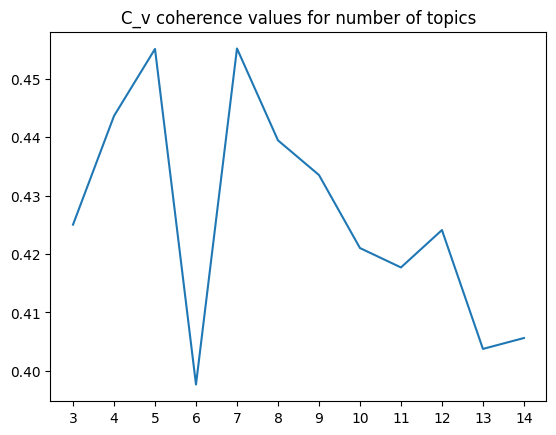

In [ ]:
x = [i[0] for i in coherence_values]
y = [i[1] for i in coherence_values]

sns.lineplot(x=x, y=y)
plt.title('C_v coherence values for number of topics')
plt.xticks(x)
plt.savefig('240520_cv_coherence.png')
plt.show()

## 5.3 Topic modelling

In [ ]:
# running the LDA
lda_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, passes=10, iterations=50)

In [ ]:
for i in range(lda_model.num_topics):
  print(f'topic{i}: {[t[0] for t in lda_model.show_topic(i, topn=10)]}')

topic0: ['area', 'like', 'nature', 'nordhavn', 'water', 'would', 'make', 'city', 'feel', 'wild']
topic1: ['tree', 'area', 'park', 'nature', 'swimming', 'shrub', 'sport', 'flower', 'place', 'forest']
topic2: ['bathing', 'facility', 'area', 'swimming', 'sport', 'bench', 'need', 'club', 'cosy', 'gras']
topic3: ['nature', 'wild', 'area', 'wild_nature', 'person', 'green', 'city', 'nordhavn', 'space', 'important']
topic4: ['area', 'football', 'sport', 'pitch', 'close', 'football_pitch', 'child', 'place', 'facility', 'space']


In [ ]:
topic_words = {}

for i in range(lda_model.num_topics):
  topic = 'topic_'+str(i)
  topic_words[topic] = lda_model.show_topic(i)

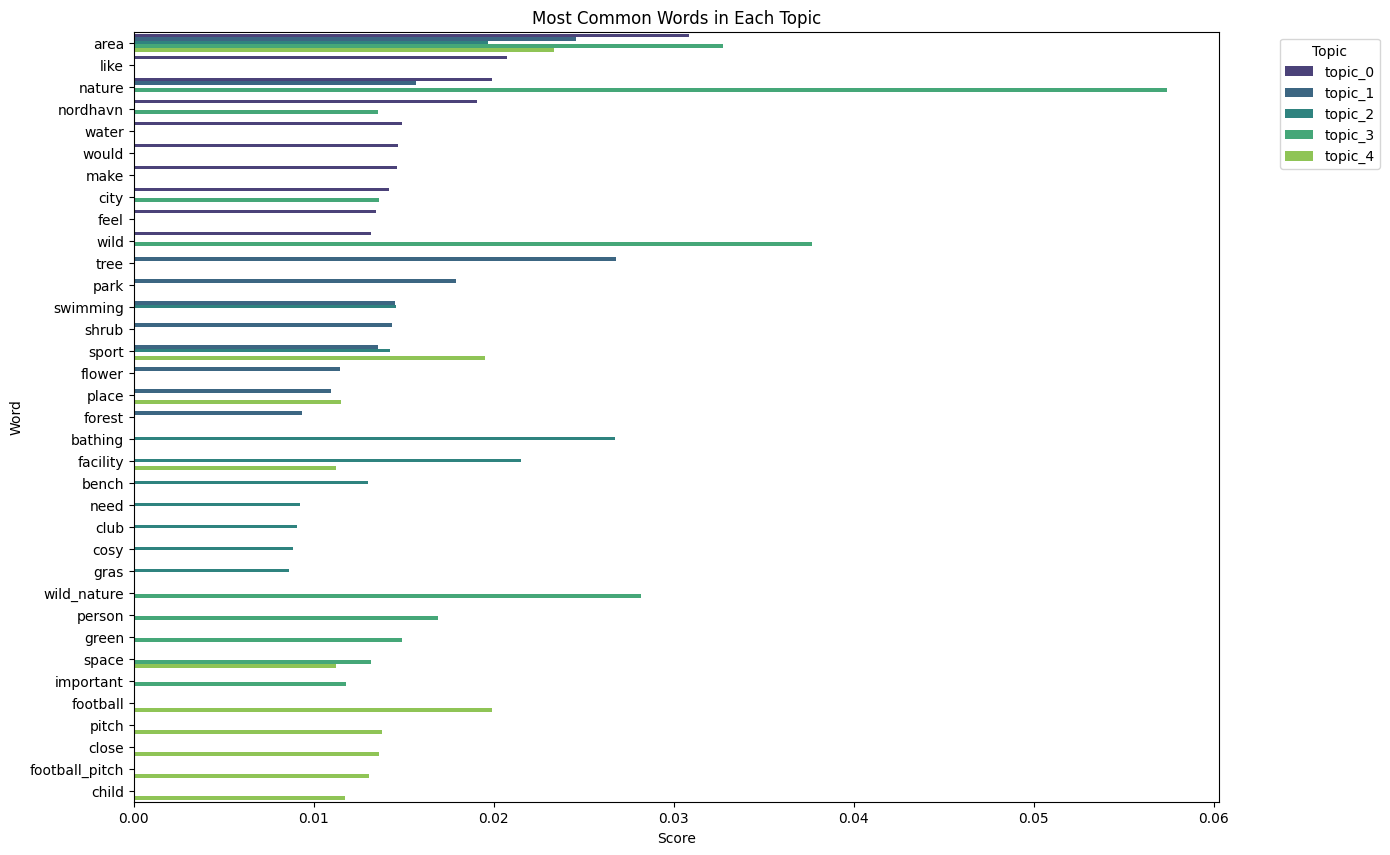

In [ ]:
data = []
for topic, words in topic_words.items():
    for word, score in words:
        data.append([topic, word, score])

plot_df = pd.DataFrame(data, columns=['Topic', 'Word', 'Score'])

plt.figure(figsize=(14, 10))
sns.barplot(x='Score', y='Word', hue='Topic', data=plot_df, palette='viridis')
plt.title('Most Common Words in Each Topic')
plt.xlabel('Score')
plt.ylabel('Word')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5.4 Assign topic to documents

In [ ]:
# 1. Getting lists of topic probabilities/gamma parameters for each document
document_probs=list(lda_model.get_document_topics(corpus, minimum_probability=0.0))

In [ ]:
# 2. Saving gamma probabilties to dataframe
# Creating a list of names for all 50 topics
topics = ['topic_{}'.format(t) for t in range(lda_model.num_topics)]

In [ ]:
# 3. Creating a dataframe of zeros that has shape: documents X topics. Columns are the list of names
gamma_probs = pd.DataFrame(np.zeros((len(document_probs), lda_model.num_topics)), columns=topics)
# gamma_probs.insert(loc=0, column='idx', value=range(len(document_probs)))

for i, doc in enumerate(document_probs): #looping over document index and topic probabilities for each document
    for pair in doc: # looping over all topic-probability-pairs in each document
        #locating correct document index and column name and saving each probability in the dataframe
        gamma_probs.loc[i,'topic_{}'.format(pair[0])] = pair[1]

In [ ]:
# 4. Assign topics of each document if document is not empty
topic_names = ['topic_{}'.format(t) for t in range(lda_model.num_topics)]
gamma_probs['topic'] = gamma_probs[topic_names].idxmax(axis=1)

In [ ]:
# 5. Concatenating datarame of gamma probabilities with dataframe of aggragated tweets.
gamma_df = pd.concat((df, gamma_probs), axis=1)
gamma_df.head(2)

,respondent_id,category,wish,comment,gender,age,nn_awareness,sports_member,enviro_member,children_under18,...,skate,swim_ming,geometry,tokens,topic_0,topic_1,topic_2,topic_3,topic_4,topic
0,88pna6cwg8x6,wild_nature,1,"Animals The beauty, the calm.",Woman,71.0,Yes,No,No,NaN,...,0,0,POINT (12.61761 55.72592),"[animal, beauty, calm, animal_beauty, beauty_c...",0.050091,0.613756,0.050164,0.235982,0.050008,topic_1
1,3zn6v4bl3jv3,wild_nature,1,North Sea-like forest that can cope with the c...,Man,23.0,Yes,No,No,NaN,...,0,0,POINT (12.61565 55.71912),"[north, forest, cope, coastal, pressure, salty...",0.041738,0.365230,0.037218,0.552362,0.003451,topic_3


In [ ]:
# Most representative document per topic
most_repr_sents = gamma_df.loc[gamma_df[topic_names].idxmax()][['topic', 'comment', 'category']]
most_repr_sents.to_csv('most_representative_documents_by_topic.csv')

In [ ]:
most_repr_sents

,topic,comment,category
2080,topic_0,Inspired by Sydhavnstippen It's in short suppl...,wild_nature
2307,topic_1,I think there needs to be a balance so that it...,social_areas
2090,topic_2,Large football pitches I don't think it can be...,sports_facilities
2303,topic_3,"Lots of beautiful trees, plants and flowers. F...",lawns_flowers
1676,topic_4,biodiversity of native Danish plants. Preferab...,wild_nature


In [ ]:
# topics per category
categories_ordered = gamma_df.category.unique()
topics_ordered = topic_names

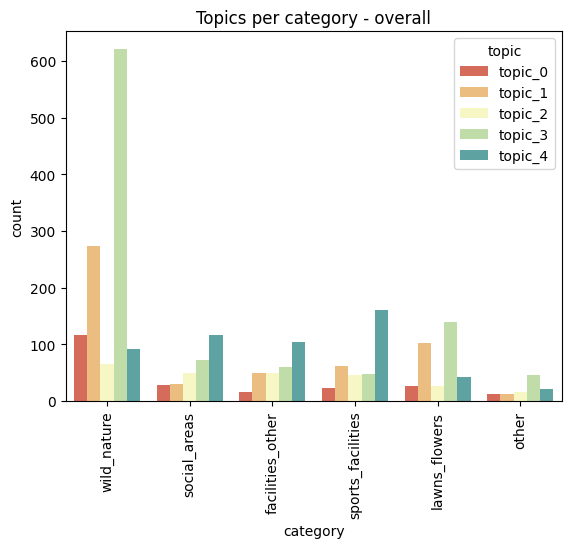

In [ ]:
countplot(gamma_df, x='category', order=categories_ordered, hue='topic', title='Topics per category - overall', hue_order=topics_ordered)

# 6. Word Embeddings

## 6.1 Preparing libraries

In [13]:
pip install mittens

In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.initializers import Constant
from sklearn.manifold import TSNE

from mittens import Mittens # for fine-tuning
import csv

## 6.2 Preparing my data

In [15]:
unigram_corpus = []
for i in range(len(merged_df)):
  try:
    unigram_corpus.append(merged_df.loc[i].unigrams)
  except:
    continue

## 6.2 Training a word2vec model on my corpus

In [16]:
# training a word2vec model using a skip-gram algorithm
comments2vec = Word2Vec(sentences=unigram_corpus, vector_size=300, window=5,
                        min_count=2, epochs=3, seed=42, sg=1)

In [17]:
word = 'nature'
print(f'Most similar words to {word}:')
comments2vec.wv.most_similar(word, 10)

Most similar words to nature:


[('wild', 0.016473358497023582),
 ('pa', 0.010513261891901493),
 ('bird', 0.01016437727957964),
 ('insect', 0.007738202344626188),
 ('animal', 0.007672388106584549),
 ('tree', 0.002010047435760498),
 ('shrub', 0.0007502133958041668),
 ('plant', 0.0006058118888176978),
 ('biodiversity', 8.190346125047654e-05),
 ('possible', -0.001242297119461)]

In [18]:
word = 'nordhavn'
print(f'Most similar words to {word}:')
comments2vec.wv.most_similar(word, 10)

Most similar words to nordhavn:


[('pa', 0.06057221069931984),
 ('toddler', 0.01650787517428398),
 ('typically', 0.015501382760703564),
 ('merrier', 0.013428500853478909),
 ('wading', 0.012556335888803005),
 ('network', 0.011885014362633228),
 ('inhabited', 0.011428662575781345),
 ('motorsport', 0.011242477223277092),
 ('accommodation', 0.011130757629871368),
 ('clinical', 0.010762123391032219)]

In [ ]:
words = ['nature', 'animal', 'walk', 'swim', 'shrub', 'football']
for word in words:
  print(f'Most similar words to {word}:')
  print(comments2vec.wv.most_similar(word, 10))

Most similar words to nature:
[('bird', 0.022420113906264305), ('insect', 0.01863742806017399), ('pa', 0.017114827409386635), ('animal', 0.01631273701786995), ('wild', 0.01566474698483944), ('shrub', 0.009347428567707539), ('plant', 0.00846885610371828), ('flower', 0.007486049085855484), ('provide', 0.004757304210215807), ('possible', 0.0038284198381006718)]
Most similar words to animal:
[('bird', 0.033460021018981934), ('insect', 0.03241850063204765), ('flower', 0.020554639399051666), ('shrub', 0.017969340085983276), ('tree', 0.016776954755187035), ('plant', 0.012806940823793411), ('wild', 0.009264737367630005), ('nature', 0.005063950549811125), ('gras', 0.004050067160278559), ('capture', 0.003618610091507435)]
Most similar words to walk:
[('pa', 0.05812004208564758), ('buffer', 0.01940653659403324), ('dog', 0.01731901802122593), ('teenager', 0.013785046525299549), ('feasible', 0.013286764733493328), ('inhabited', 0.011788671836256981), ('ecosystem', 0.011615230701863766), ('capture',

In [ ]:
words_of_interest = ['nature', 'animal', 'walk', 'swim', 'shrub', 'football']

word_similarities = []

for woi in words_of_interest:
  df_temp = pd.DataFrame(comments2vec.wv.most_similar(woi, 10),
                         columns=[woi+"_word", woi+"_similarity"])
  word_similarities.append(df_temp)

word_similarities_df = pd.concat([pd.DataFrame(x) for x in word_similarities], axis=1)
word_similarities_df

,nature_word,nature_similarity,animal_word,animal_similarity,walk_word,walk_similarity,swim_word,swim_similarity,shrub_word,shrub_similarity,football_word,football_similarity
0,bird,0.022420,bird,0.033460,pa,0.058120,pa,0.067609,bird,0.023117,,0.049283
1,insect,0.018637,insect,0.032419,buffer,0.019407,,0.038697,insect,0.020677,pa,0.023817
2,pa,0.017115,flower,0.020555,dog,0.017319,swimming,0.023626,flower,0.019397,pitch,0.018516
3,animal,0.016313,shrub,0.017969,teenager,0.013785,inhabited,0.022771,tree,0.018717,medium,0.018056
4,wild,0.015665,tree,0.016777,feasible,0.013287,toddler,0.022377,animal,0.011901,sport,-0.001938
5,shrub,0.009347,plant,0.012807,inhabited,0.011789,wading,0.022372,plant,0.011241,facility,-0.007590
6,plant,0.008469,wild,0.009265,ecosystem,0.011615,ro,0.020271,gras,0.005577,court,-0.007932
7,flower,0.007486,nature,0.005064,capture,0.011554,pool,0.019299,wild,0.001993,swimming,-0.008110
8,provide,0.004757,gras,0.004050,aesthetically,0.011413,outdoor,0.017042,biodiversity,-0.005560,pool,-0.008603
9,possible,0.003828,capture,0.003619,privilege,0.011380,reflection,0.016930,nature,-0.005733,basketball,-0.012400


In [ ]:
word = 'recreation'
print(f'Most similar words to {word}:')
comments2vec.wv.most_similar(word, 10)

Most similar words to recreation:


[('pa', 0.03640266880393028),
 ('shady', 0.02323492243885994),
 ('meditative', 0.02288099005818367),
 ('wading', 0.0228261761367321),
 ('dinghy', 0.021373389288783073),
 ('capture', 0.021166369318962097),
 ('toddler', 0.02098166197538376),
 ('crucial', 0.020637571811676025),
 ('teenager', 0.02008628472685814),
 ('attempt', 0.019470855593681335)]

In [19]:
word_similarities_df.to_csv('w2v_mycorpus.csv')

NameError: name 'word_similarities_df' is not defined

In [ ]:
# Store just the words + their trained embeddings.
word_vectors = comments2vec.wv
word_vectors.save("comments2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("comments2vec.wordvectors", mmap='r')

In [ ]:
# Get first 200 words of words for visualization
words = list(wv.key_to_index.keys())[:200]

# Get the corresponding vectors for the words
word_vectors = wv[words]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(word_vectors)

# Extract x and y coordinates
x_coords = reduced_vectors[:, 0]
y_coords = reduced_vectors[:, 1]

# Plot the embeddings
plt.figure(figsize=(12, 12))
plt.scatter(x_coords, y_coords)

# Add labels for each point
for i, word in enumerate(words):
    plt.annotate(word, (x_coords[i], y_coords[i]))

plt.title('t-SNE visualization of word embeddings trained on corpus')
plt.tight_layout()
plt.savefig('240521_tSNE_wv.png')
plt.show()

## 6.3 Fine-tuning a pre-trained model with my corpus
- load pre-trained embedding from https://nlp.stanford.edu/projects/glove/ (*glove-6B*)
- prepare corpus, vocabulary, cooccurrence on own data
- fine-tune pre-trained embeddings
- check similarities and evaluate the models
- plot t-SNE of final model

In [20]:
# source: https://github.com/roamanalytics/mittens
def glove2dict(glove_filename):
    with open(glove_filename) as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                for line in reader}
    return embed

In [22]:
# source: Pennington et al. (2014)
glove_embedding_dict_6B = glove2dict('glove.6B.50d.txt')

In [23]:
# 2. preparing my corpus, vocabulary and co-occurrence
tokenized_corpus = unigram_corpus

# Build the vocabulary
vocabulary = Counter(word for doc in tokenized_corpus for word in doc)
vocab_list = list(vocabulary.keys())
word_to_id = {word: idx for idx, word in enumerate(vocab_list)}

# Create the co-occurrence matrix
window_size = 2
cooccurrence_matrix = np.zeros((len(vocab_list), len(vocab_list)), dtype=np.int32)

for doc in tokenized_corpus:
    for i, word in enumerate(doc):
        word_id = word_to_id[word]
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(doc))
        for j in range(start, end):
            if i != j:
                other_word_id = word_to_id[doc[j]]
                cooccurrence_matrix[word_id][other_word_id] += 1

In [24]:
# 3. fitting the Mittens model - takes ca. 15 min / 1000 iterations
mittens_model = Mittens(n=50, max_iter=5000)
new_embeddings = mittens_model.fit(
    cooccurrence_matrix,
    vocab=vocab_list,
    initial_embedding_dict=glove_embedding_dict_6B)

# Convert new_embeddings to a dictionary for easy lookup
new_embedding_dict = {word: new_embeddings[idx] for idx, word in enumerate(vocab_list)}

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Iteration 5000: loss: 32.40904998779297

In [25]:
# Checking the original embedding: converting it to KeyedVectors
# Initialize a KeyedVectors instance
vector_size = 50  # Dimension of the word embeddings
pretrained_kv = KeyedVectors(vector_size=vector_size)

# Add the embeddings to the KeyedVectors instance
pretrained_kv.add_vectors(list(glove_embedding_dict_6B.keys()), list(glove_embedding_dict_6B.values()))

In [26]:
word = 'nature'
print(f'Most similar words to {word}:')
pretrained_kv.most_similar(word, 10)

Most similar words to nature:


[('alstonia', 0.7776990532875061),
 ('afrocentrism', 0.7181478142738342),
 ('impermanent', 0.7119420170783997),
 ('ahistorical', 0.7036404609680176),
 ('oneota', 0.693561315536499),
 ('qiangtang', 0.6904467344284058),
 ('enchantingly', 0.6902616024017334),
 ('colorism', 0.6898907423019409),
 ('sphodromantis', 0.6839612722396851),
 ('gulella', 0.6769443154335022)]

In [27]:
word = 'nordhavn'
print(f'Most similar words to {word}:')
pretrained_kv.most_similar(word, 10)

Most similar words to nordhavn:


KeyError: "Key 'nordhavn' not present in vocabulary"

In [28]:
words_of_interest = ['nature', 'animal', 'walk', 'swim', 'shrub', 'football']

word_similarities = []

for woi in words_of_interest:
  df_temp = pd.DataFrame(pretrained_kv.most_similar(woi, 10),
                         columns=[woi+"_word", woi+"_similarity"])
  word_similarities.append(df_temp)

word_similarities_df = pd.concat([pd.DataFrame(x) for x in word_similarities], axis=1)
word_similarities_df

,nature_word,nature_similarity,animal_word,animal_similarity,walk_word,walk_similarity,swim_word,swim_similarity,shrub_word,shrub_similarity,football_word,football_similarity
0,alstonia,0.777699,liberationists,0.798065,puked,0.665343,oly-2004-aus,0.731990,mirosternus,0.762438,victorian/australian,0.776808
1,afrocentrism,0.718148,behaviourist,0.714532,saunter,0.659916,kirra,0.699959,2371,0.753609,makana,0.715484
2,impermanent,0.711942,behaviorists,0.695108,perp,0.658301,sunbathe,0.697226,xyletobius,0.746961,subassociation,0.711553
3,ahistorical,0.703640,airavata,0.694385,razah,0.657712,swims,0.689753,liolaemus,0.742071,opjhl,0.693064
4,oneota,0.693561,meat-eating,0.692298,strolling,0.651129,stuey,0.679854,eudalaca,0.732607,ciau,0.690762
5,qiangtang,0.690447,stegodon,0.690202,gallivanting,0.649735,snorkeled,0.679557,cheatgrass,0.727166,lnah,0.674860
6,enchantingly,0.690262,fur-bearing,0.689764,crawdad,0.649231,heiliger,0.674745,oreophryne,0.723944,pasl,0.672367
7,colorism,0.689891,microorganism,0.686675,amble,0.648154,loll,0.665507,renia,0.719803,bugeaters,0.672346
8,sphodromantis,0.683961,louse,0.680534,hushes,0.646584,bokeem,0.664875,micajah,0.719299,garryowen,0.668412
9,gulella,0.676944,aspca,0.676936,atara,0.645335,baldhead,0.663940,hypsiboas,0.718403,jubo,0.664102


In [29]:
word_similarities_df.to_csv('w2v_pretrained.csv')

In [30]:
# Convert fine-tuned embedding to KeyedVector for further inspection
# Initialize a KeyedVectors instance
vector_size = 50  # Dimension of the word embeddings
kv = KeyedVectors(vector_size=vector_size)

# Add the embeddings to the KeyedVectors instance
kv.add_vectors(list(new_embedding_dict.keys()), list(new_embedding_dict.values()))

# Save the KeyedVectors instance in Word2Vec format
kv.save_word2vec_format('word_embeddings_word2vec.txt', binary=False)

# Load the Word2Vec format embeddings
finetuned_kv = KeyedVectors.load_word2vec_format('word_embeddings_word2vec.txt', binary=False)

# Verify by printing the embedding of a word
print(finetuned_kv['nature'])

[ 1.5377438   0.35342243 -2.203498    0.8509742   1.0162466  -0.52123165
  0.31489435 -1.053074    0.10038657  0.42425337 -1.0190018   0.0541344
  0.85717785 -0.3537569  -0.25679442  0.06563376  1.7490425  -0.28980756
 -1.1715871   0.42016003 -1.5772835   0.30794582 -0.29420108 -0.69894457
  0.42148957 -1.0259187  -1.2502351   0.6452135   0.6788013  -0.45257393
  2.933001   -0.41801727 -0.54559296 -1.8125913  -0.5020007   0.38428915
  0.00683621 -0.46366668 -0.3068803  -0.3909689   0.25378737 -0.664179
  0.04182109  1.1628542   0.6246766   0.29527226  0.06148693  0.7440615
  1.3629122   0.67530805]


In [31]:
word = 'nature'
print(f'Most similar words to {word}:')
finetuned_kv.most_similar(word, 10)

Most similar words to nature:


[('birdlife', 0.45936715602874756),
 ('philistine', 0.446389764547348),
 ('nordhavnstippen', 0.4246467053890228),
 ('botanical', 0.39885246753692627),
 ('inappropriate', 0.38220787048339844),
 ('aspect', 0.38080963492393494),
 ('undefined', 0.3778858482837677),
 ('amenity', 0.37748077511787415),
 ('grotesque', 0.3773461878299713),
 ('viewpoint', 0.37275609374046326)]

In [32]:
word = 'nordhavn'
print(f'Most similar words to {word}:')
finetuned_kv.most_similar(word, 10)

Most similar words to nordhavn:


[('sportsfaciliteter', 0.38379549980163574),
 ('østerbro', 0.37218335270881653),
 ('christiania', 0.3592160940170288),
 ('bispebjerg', 0.3491511344909668),
 ('bellevue', 0.33829423785209656),
 ('annex', 0.33123308420181274),
 ('dweller', 0.32631421089172363),
 ('washroom', 0.31811270117759705),
 ('frederiksberg', 0.31344980001449585),
 ('amager', 0.31245625019073486)]

In [34]:
word = 'nordhavnstippen'
print(f'Most similar words to {word}:')
finetuned_kv.most_similar(word, 10)

Most similar words to nordhavnstippen:


[('solvej', 0.385752409696579),
 ('labelled', 0.3710080087184906),
 ('sect', 0.37088048458099365),
 ('plot', 0.363464891910553),
 ('bin', 0.35601523518562317),
 ('birdlife', 0.35575515031814575),
 ('tenting', 0.34850797057151794),
 ('biased', 0.344620019197464),
 ('belonging', 0.33570581674575806),
 ('contradicting', 0.32551828026771545)]

In [33]:
words_of_interest = ['nature', 'animal', 'walk', 'swim', 'shrub', 'football']

word_similarities = []

for woi in words_of_interest:
  df_temp = pd.DataFrame(finetuned_kv.most_similar(woi, 10),
                         columns=[woi+"_word", woi+"_similarity"])
  word_similarities.append(df_temp)

word_similarities_df = pd.concat([pd.DataFrame(x) for x in word_similarities], axis=1)
word_similarities_df

,nature_word,nature_similarity,animal_word,animal_similarity,walk_word,walk_similarity,swim_word,swim_similarity,shrub_word,shrub_similarity,football_word,football_similarity
0,birdlife,0.459367,rodent,0.490357,strolling,0.481597,sunbathing,0.563643,untrimmed,0.512896,soccer,0.570383
1,philistine,0.446390,giraffe,0.487961,stroll,0.462744,sunbathe,0.550360,bushy,0.505039,handball,0.553637
2,nordhavnstippen,0.424647,pet,0.476366,walked,0.454282,cub,0.495172,perennial,0.500889,basketball,0.550722
3,botanical,0.398852,insect,0.471784,fenced,0.443000,rollerblading,0.469384,conifer,0.498696,athletic,0.510403
4,inappropriate,0.382208,mammal,0.470024,mecca,0.415758,kayak,0.442799,toucan,0.481972,club,0.490474
5,aspect,0.380810,bird,0.460566,walking,0.410185,amager,0.441572,salamander,0.459262,ordentlig,0.483386
6,undefined,0.377886,cow,0.457953,shopping,0.407631,canoeing,0.435703,privet,0.451587,volleyball,0.463693
7,amenity,0.377481,reptile,0.445956,bedroom,0.405447,polo,0.433838,unkempt,0.440607,sporting,0.440417
8,grotesque,0.377346,birdlife,0.441784,locker,0.398994,lounging,0.433625,overgrown,0.438840,polo,0.429366
9,viewpoint,0.372756,sect,0.440651,tucked,0.396359,rolex,0.432839,flowering,0.431240,team,0.419432


In [ ]:
word_similarities_df.to_csv('w2v_finetuned.csv')

In [ ]:
# Store just the words + their trained embeddings.
word_vectors = finetuned_kv
word_vectors.save("finetuned.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("finetuned.wordvectors", mmap='r')

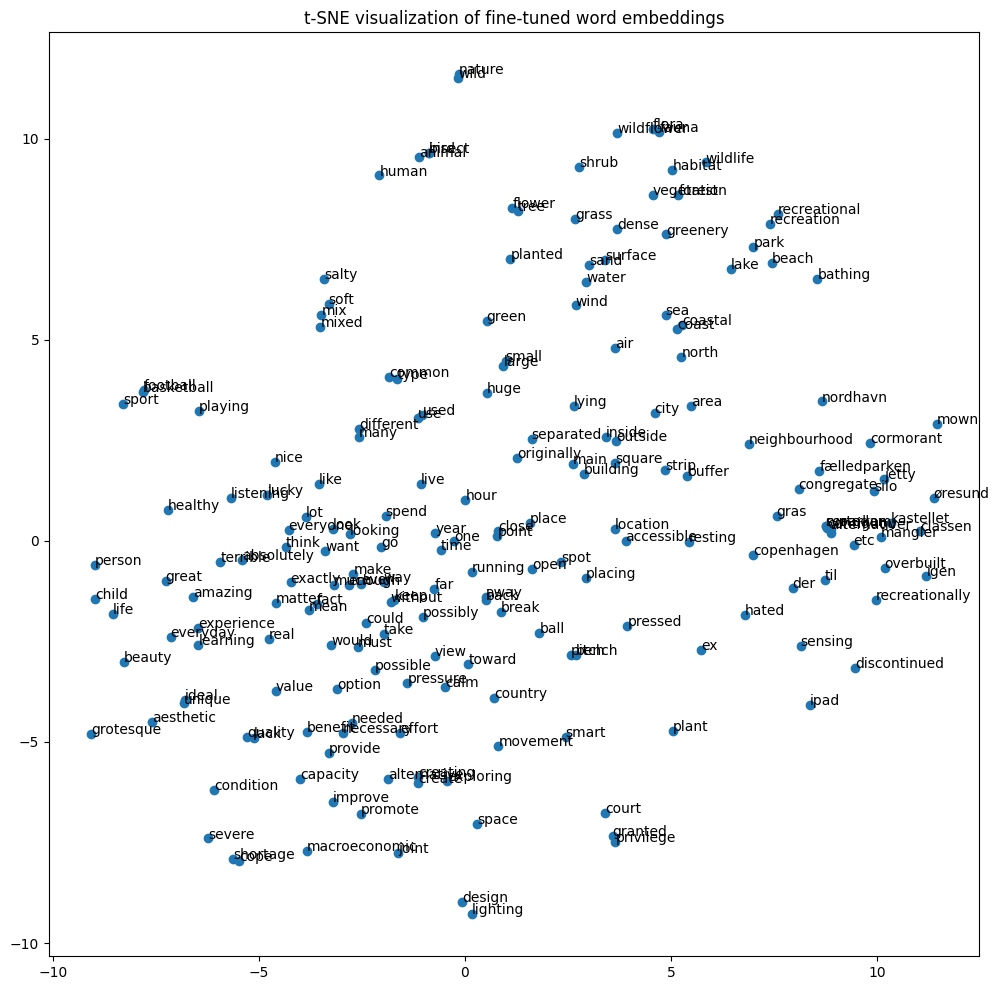

In [ ]:
# let's try to see what these embeddings look like in 2D space

embedding = wv  # fill in the desired embedding

# Get first 200 words of words for visualization
words = list(embedding.key_to_index.keys())[:200]

# Get the corresponding vectors for the words
word_vectors = embedding[words]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(word_vectors)

# Extract x and y coordinates
x_coords = reduced_vectors[:, 0]
y_coords = reduced_vectors[:, 1]

# Plot the embeddings
plt.figure(figsize=(12, 12))
plt.scatter(x_coords, y_coords)

# Add labels for each point
for i, word in enumerate(words):
    plt.annotate(word, (x_coords[i], y_coords[i]))

plt.title('t-SNE visualization of fine-tuned word embeddings')
plt.savefig('240521_tSNE_wv_finetuned.png')
plt.show()

# Next up:
**Output data:** merged_df.geojson
- QGIS